In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = model_name_list[0] #JavaSocket
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


['6', '21', '16', '1', '22', '20', '26', '8', '12', '28', '2', '11', '13', '15', '27', '7', '4', '23', '17', '0', '25', '19', '18', '5', '24', '14', '3', '10', '9']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv )

In [3]:
#calculate mutation score for each model = killed / all mutants
# TODO ....



In [11]:
def get_longest_list(m):
    
    if len(m[0]) >= len(m[1])  and len(m[0]) >= len(m[2])and len(m[0]) >= len(m[3]):
            
        return 0
    elif len(m[1]) >= len(m_lists[0]) and len(m[1]) >= len(m_lists[2]) and len(m[1]) >= len(m_lists[3]):
            
        return 1
    elif len(m[2]) >= len(m[0]) and len(m[2]) >= len(m[1]) and len(m[2]) >= len(m[3]):
            
        return 2
    elif len(m[3]) >= len(m[0]) and len(m[3]) >= len(m[1]) and len(m[3]) >= len(m[2]):
        return 3


    
def make_same_size_lists(big_list, small_m_list, small_cretieria_list):
    for i, v in enumerate(big_list):
        if i > len(small_m_list)-1:
            print(f'index= {i} not in list')

            small_m_list.insert(i, '-1')
            small_cretieria_list.insert(i, 0.0)

        elif small_m_list[i] != v:
            print(f'index= {i} has value: {v}')
            small_m_list.insert(i, '-1')
            small_cretieria_list.insert(i, 0.0) 
            
def print_4_models(lists, list_type):
    print(f"bes_loop_{list_type}:     {lists[0]}")
    print(f"rand_loop_{list_type}:    {lists[1]}")
    
    print(f"bes_no_loop_{list_type}:  {lists[2]}")
    print(f"rand_no_loop_{list_type}: {lists[3]}")
    print("-----------------------------------------------")
    
    
#

def get_killed_mutant_all(dfs):
    bes_m_l_list     = get_killed_mutant_array(dfs[0]) 
    rand_m_l_list    = get_killed_mutant_array(dfs[1]) 
    bes_m_no_l_list  = get_killed_mutant_array(dfs[2]) 
    rand_m_no_l_list = get_killed_mutant_array(dfs[3]) 

    m_lists = (bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list)
    return m_lists


def get_cretiera_all(dfs, creteria):
    bes_lo_c     = get_float_column(dfs[0], creteria)
    rand_lo_c    = get_float_column(dfs[1], creteria) 
    bes_no_lo_c  = get_float_column(dfs[2], creteria)
    rand_no_lo_c = get_float_column(dfs[3], creteria)

    c_lists = (bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c)
    return c_lists


In [13]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 


creteria =  'actual_tests'# 'time_taken' # 'actual_tests'
c_lists = get_cretiera_all(dfs, creteria)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

# bes_lo_c = get_float_column(bes_lo_k_csv, creteria)
# rand_lo_c = get_killed_mutant_array(rand_lo_k_csv) 
# bes_no_lo_c = get_float_column(bes_no_lo_k_csv, creteria)
# rand_no_lo_c = get_float_column(rand_no_lo_k_csv, creteria)

# m_lists = (bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list)
# c_lists = (bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c)

biggest =  get_longest_list(m_lists)
print_4_models(m_lists, 'killed_mutant')
print_4_models(c_lists, creteria)

for i, l in enumerate(m_lists):
    make_same_size_lists(m_lists[biggest], l, c_lists[i])

print_4_models(m_lists, 'killed_mutant')
print_4_models(c_lists, creteria)

    

# bes_m_no_l_list = ['0', '1', '3', '22', '25']

# # make_same_size_lists(m_lists[biggest], bes_m_no_l_list, bes_no_lo_k)
# print(rand_m_no_l_list)
# make_same_size_lists(m_lists[biggest], rand_m_no_l_list, rand_m_no_k)

# print(bes_m_no_l_list)
# print(rand_m_no_l_list)
# [4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 5.0, 3.0, 190.0]
# no_loops: [4.0, 4.0, 4.0, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 4.0, 5.0]
# biggest:  ['0', '1', '3', '22', '23', '24', '25', '27', '28']
# missing:  ['0', '1', '3', '22', '-1', '-1', '25', '-1', '-1']

bes_loop_killed_mutant:     ['0', '1', '3', '22', '23', '24', '25', '27', '28']
rand_loop_killed_mutant:    ['0', '1', '3', '22', '23', '24', '25', '27', '28']
bes_no_loop_killed_mutant:  ['0', '1', '3', '22', '23', '24', '25']
rand_no_loop_killed_mutant: ['0', '1', '3', '22', '23', '24', '25', '27', '28']
-----------------------------------------------
bes_loop_actual_tests:     [4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 5.0, 3.0, 190.0]
rand_loop_actual_tests:    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 27.0, 121.0]
bes_no_loop_actual_tests:  [4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 5.0]
rand_no_loop_actual_tests: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 8.0, 70.0]
-----------------------------------------------
index= 7 not in list
index= 8 not in list
bes_loop_killed_mutant:     ['0', '1', '3', '22', '23', '24', '25', '27', '28']
rand_loop_killed_mutant:    ['0', '1', '3', '22', '23', '24', '25', '27', '28']
bes_no_loop_killed_mutant:  ['0', '1', '3', '22', '23', '24', '25', '-1', '-1']
rand_no_loop_killed_mutant

Hello
[4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 5.0, 3.0, 190.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 27.0, 121.0]
[4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 5.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 8.0, 70.0]


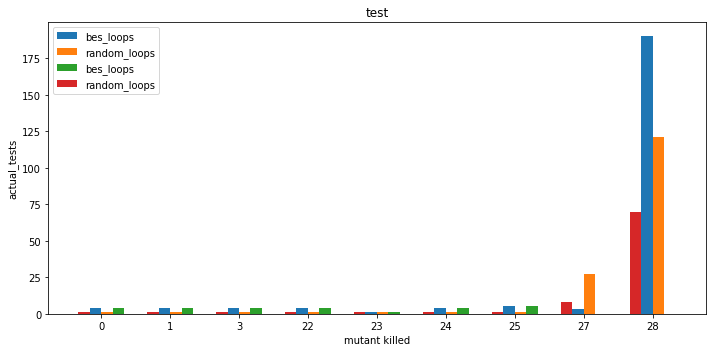

In [15]:

#TODO when not all mutants are in the same list
def plot_4_bars(labels, data_list, d_map):
    
    bes_l, rand_l, bes_no_l, rand_no_l = data_list
    
    x = 3*np.arange(len(labels))  # the label locations
    width = d_map['bar_width'] #0.35  # the width of the bars

#     print(x)
    indent = width / 2
    
    print(bes_l)
    print(rand_l)
    print(bes_no_l)
    print(rand_no_l)

    
    
    
    fig, ax = plt.subplots( figsize=(10, 5))
                           #,gridspec_kw={'width_ratios': [map_bes['width_ratio'], map_rand['width_ratio']]})
    
    rects1 = ax.bar(x - indent, bes_l, width, label=d_map['bes_label'])
    rects2 = ax.bar(x + indent, rand_l, width, label=d_map['random_label'])
    
    rects3 = ax.bar(x + 3*indent, bes_no_l, width, label=d_map['bes_label'])
    rects4 = ax.bar(x - 3*indent, rand_no_l, width, label=d_map['random_label'])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(d_map['x_label'])
    ax.set_ylabel(d_map['y_label'])

    ax.set_title(d_map['title'])
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

#     ax.bar_label(rects1, padding=3)
#     ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    
#     ax.set_xlim([0,50])
    plt.show()

    
#
print("Hello")
creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

labels = m_lists[biggest] #get_killed_mutant_array(bes_lo_k_csv) #TODO make a function that bring the common killed mutantant or inject 0 otherwise
d_map = {
    'bar_width' : 0.5, 
    'x_label': 'mutant killed', 
    'y_label': creteria, #TODO 
    'title': 'test',
    'bes_label': 'bes_loops',
    'random_label': 'random_loops'
    
}

# bes_lo_k = get_float_column(bes_lo_k_csv, creteria)
# rand_lo_k = get_float_column(rand_lo_k_csv, creteria)
# bes_no_lo_k = get_float_column(bes_no_lo_k_csv, creteria)
# rand_no_lo_k = get_float_column(rand_no_lo_k_csv, creteria)

# print(get_killed_mutant_array(bes_lo_k_csv))
# print(get_killed_mutant_array(bes_no_lo_k_csv))

# bes_no_lo_k = np.append(bes_no_lo_k, [0.0, 0.0])


# data_list = (bes_lo_k, rand_lo_k,  bes_no_lo_k, rand_no_lo_k)
# data_list = (bes_lo_k, rand_lo_k,  bes_no_lo_k, rand_no_lo_k)



plot_4_bars(labels, c_lists, d_map)


    

In [ ]:
def diff_killed_mutants(bes_killed_df, rand_killed_df):
    bes_killed = sorted(bes_killed_df.tolist())
    rand_killed = sorted(rand_killed_df.tolist())
    
    print(f"bes:  {bes_killed}")
    print("------------------")
    print(f"rand: {rand_killed}")
    print("------------------")

    diff = list(set(bes_killed).symmetric_difference(set(rand_killed))) 
    print(f"The mutant/s: {diff} \nhas been kiled by bes/random and not the other")
    
    return diff

def get_mutation_score(csv_file, all_mutants):
    killed_mutants = csv_file['mutant_number'].tolist()
    return len(killed_mutants) / len(all_mutants)
    
# bes_killed_csv = pd.read_csv(os.path.join('csvs', 'killed_SimpleModel_bes_loops.csv'))
# rand_killed_csv = pd.read_csv(os.path.join('csvs', 'killed_SimpleModel_random_loops.csv'))

# diff_killed_mutants(bes_killed_csv['mutant_number'], rand_killed_csv['mutant_number'])


In [ ]:
# def get_killed_mutant_number(csv_file, model_name):
#     all_mutants = [p for p in os.listdir(os.path.join("merged_mutants", 
#                     f'{system_map[model_name]}')) if p[0] != '.']
    
#     killed_m_nr = bes_file['mutant_number']
#     killed_m_n = filter_frame_array(bes_killed_csv, 'killed_mutant', 'mutant_number')

    
#     return (len(all_mutants), len(killed_m_nr))


In [ ]:
# df[df['A'].isin([3, 6])] filter ysing a list


all_killed_m_number = bes_killed_csv['mutant_number']
# a_l = list(all_killed_m_number)
a_a = all_killed_m_number.to_numpy()

# unique = []
# for m in a_a:
#     if m in unique:
#         print("[WARNING] to data has same value")
#     else: 
#         unique.append(m)



In [ ]:

labels = convert_int_arr_to_str(killed_m_n) #['G1', 'G2', 'G3', 'G4', 'G5']
men_means = convert_str_arr_to_int(actual_sizes) #[20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()





In [ ]:

# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# # ax.bar_label(rects1, padding=3)
# # ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()